In [1]:
import sys
!conda install --yes --prefix {sys.prefix} requests
!conda install --yes --prefix {sys.prefix} bs4
!conda install --yes --prefix {sys.prefix} lxml
!{sys.executable} -m pip install bs4
!{sys.executable} -m pip install lxml

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import requests 
from bs4 import BeautifulSoup
import re

In [3]:
url = "https://www.iihs.org/topics/fatality-statistics/detail/yearly-snapshot"
html = requests.get(url).content
# print(html)
soup = BeautifulSoup(html, 'lxml')

 


In [4]:
with open("car_crashes.htm") as file_reader:
    soup = BeautifulSoup(file_reader, "lxml")

In [5]:
title = print(soup.find("th").get_text())
title

Number of deaths, crashes and motor vehicles in fatal crashes, 1975-2018


In [6]:
table_heads = (soup.find_all("th"))
# table_heads 

In [7]:
# print(table_heads[0])

# This function is to convert each element inside of the list into a string, so that titles of tables may more
#easily be found and re can be used
def toString(array):
    new_array = []
    for i in array:
        new_array.append(str(i))
    return new_array

table_heads_str = toString(table_heads)
# This is testing to confirm the conversion was a success 

#This isolates the names of the columns and rows of the data I am focusing on.
dataTop = table_heads_str.index('<th class="table-title" colspan="14">Motor vehicle crash deaths per 100,000 people by type, 1975-2018</th>')
dataBottom = table_heads_str.index('<th class="table-title" colspan="14">Motor vehicle crash deaths by type, 1975-2018</th>')
table_heads_str = table_heads_str[dataTop:dataBottom]
# print(table_heads_str)


# This gets all of the isolated names of the columns and rows 
def getInfo(str_list):
    info = []
    for i in str_list:
        first = i.index('>')
        last = i.index('</th>')
        info.append(i[first+1:last])
    return info

data_titles = getInfo(table_heads_str)
# print(data_titles)

#Index and remove all of the rates. only keep numbers
for x in data_titles: 
    if x == "Rate":
        data_titles.remove(x)
        
# print("here")
# for x in data_titles: 
#     if x == 'Number':
#         data_titles.remove(x)
        
# print(data_titles)

        
def new_data_titles(arry):
    new_data_titles = []
    for title in data_titles:
        if title != "Number":
            new_data_titles.append(title)
    return new_data_titles

data_titles = new_data_titles(data_titles)
# data_titles

column_titles = data_titles[:9]
row_titles = data_titles[9:]
print(column_titles)
print(row_titles)


['Motor vehicle crash deaths per 100,000 people by type, 1975-2018', 'Year', 'Population', 'Passenger vehicle occupants', 'Pedestrians', 'Motorcyclists', 'Bicyclists', 'Large truck occupants', 'All motor vehicle deaths*']
['1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']


In [8]:
table_rows1 = (soup.find_all("tr"))
table_rows1 = table_rows1[46:93]

def extract_number(arry):
    storage = []
    for item in arry:
        new_item = []
        item = str(item)
        item = item.replace(',', '')
        item = re.findall(r'\d+', item) 
        storage.append(item)
    return storage
        
extracted = extract_number(table_rows1)

# This function removes the numbers that are not apart of the data, such as row numbers and column numbers 
def remove_single_nums(arry):
    extracted_nums = []
    for num in arry:
        for i in num:
            if len(i) >= 3:
                extracted_nums.append(int(i))
    return extracted_nums
items = remove_single_nums(extracted)
items = items[3:]
items

#This function sorts the data by group
# I referred to geeksforgeeks.org for syntax to write this function
def separate(l, n): 
    for i in range(0, len(l), n):  
        yield l[i:i + n] 
sorted = list(separate(items, 8)) 
# print(sorted) 


# This function sorts all of the information by column for each year
def organize_columns(info):
    population = []
    passenger = []
    pedestrians = []
    motorcycle = []
    bike = []
    truck = []
    all_deaths = []
    for year in info:
        population.append(year[1])
        passenger.append(year[2])
        pedestrians.append(year[3])
        motorcycle.append(year[4])
        bike.append(year[5])
        truck.append(year[6])
        all_deaths.append(year[7])
    return [population, passenger, pedestrians, motorcycle, bike, truck, all_deaths]
        
col_info = organize_columns(sorted)  
print(col_info)

population = col_info[0]
passenger = col_info[1]
pedestrians = col_info[2]
motorcycle = col_info[3]
bike = col_info[4]
truck = col_info[5]
all_deaths = col_info[6]

    

[[215973199, 218035164, 220239425, 222584545, 225055487, 227224719, 229465608, 231664496, 233791903, 235824783, 237923732, 240132841, 242289023, 244498836, 246819119, 249464396, 252153092, 255029699, 257782608, 260327021, 262803276, 265228572, 267783607, 270248003, 272690813, 282192162, 285102075, 287941220, 290788976, 293655404, 296410404, 299398484, 301621157, 304059724, 307006550, 308745538, 311591917, 313914040, 316128839, 318857056, 321418820, 323405935, 325719178, 327167434], [30601, 31724, 32823, 34923, 35026, 34996, 33711, 29656, 29154, 30094, 29848, 32224, 33145, 34105, 33599, 32711, 30810, 29457, 29994, 30820, 31914, 32354, 32343, 31781, 32008, 32109, 31938, 32724, 32166, 31750, 31455, 30628, 29155, 25547, 23507, 22351, 21413, 21906, 21361, 21131, 22741, 23957, 23866, 22891], [7516, 7427, 7732, 7795, 8096, 8070, 7837, 7331, 6826, 7025, 6808, 6779, 6745, 6870, 6556, 6482, 5801, 5549, 5649, 5489, 5584, 5449, 5321, 5228, 4939, 4763, 4901, 4851, 4774, 4675, 4892, 4795, 4699, 4414

In [9]:
with open("gas_prices.html") as file_reader:
    soup2 = BeautifulSoup(file_reader, "lxml")

In [10]:
title2 = print(soup2.find("th").get_text())
title2

Year-Month


In [11]:
table_heads = (soup2.find_all("th"))
# table_heads 

In [12]:
# This function retreives the names of the column titles
gas_data_col_titles = toString(table_heads)
gas_data_col_titles = getInfo(gas_data_col_titles)
gas_data_col_titles.remove('Week 5')
# print(gas_data_col_titles)

for x in gas_data_col_titles:
    if x == 'End Date':
        gas_data_col_titles.remove(x)
for y in gas_data_col_titles:
        if y == 'Value':
            gas_data_col_titles.remove(y)
gas_data_col_titles = gas_data_col_titles[0:5]
print(gas_data_col_titles)



['Year-Month', 'Week 1', 'Week 2', 'Week 3', 'Week 4']


In [13]:
# This function gathers all elements with the class B6 - the years and months for row titles 
gas_years = soup2.find_all("td", {"class": "B6"})
gas_years = toString(gas_years)

def getData(str_list):
    titles = []
    for i in str_list:
        first = i.index('\xa0')
        last = i.index('</td>')
        titles.append(i[first+2:last])
    return titles
gas_years = getData(gas_years)
print(gas_years)


#This funtion gathers all elements with the class B3 - the prices for the rows 
gas_prices = soup2.find_all("td", {"class": "B3"})
gas_prices = toString(gas_prices)

def getPrices(str_list):
    years = []
    for i in str_list:
        first = i.index('B3">')
        last = i.index('\xa0')
        years.append(i[first+4:last])
    return years

gas_prices = getPrices(gas_prices)


# This function gets all of the official gas prices
def removeSpaces(num_list):
    only_nums = []
    for num in num_list:
        if num != '':
            only_nums.append(float(num))
    return only_nums
gas_prices = removeSpaces(gas_prices)
print(gas_prices)



['1993-Apr', '1993-May', '1993-Jun', '1993-Jul', '1993-Aug', '1993-Sep', '1993-Oct', '1993-Nov', '1993-Dec', '1994-Jan', '1994-Feb', '1994-Mar', '1994-Apr', '1994-May', '1994-Jun', '1994-Jul', '1994-Aug', '1994-Sep', '1994-Oct', '1994-Nov', '1994-Dec', '1995-Jan', '1995-Feb', '1995-Mar', '1995-Apr', '1995-May', '1995-Jun', '1995-Jul', '1995-Aug', '1995-Sep', '1995-Oct', '1995-Nov', '1995-Dec', '1996-Jan', '1996-Feb', '1996-Mar', '1996-Apr', '1996-May', '1996-Jun', '1996-Jul', '1996-Aug', '1996-Sep', '1996-Oct', '1996-Nov', '1996-Dec', '1997-Jan', '1997-Feb', '1997-Mar', '1997-Apr', '1997-May', '1997-Jun', '1997-Jul', '1997-Aug', '1997-Sep', '1997-Oct', '1997-Nov', '1997-Dec', '1998-Jan', '1998-Feb', '1998-Mar', '1998-Apr', '1998-May', '1998-Jun', '1998-Jul', '1998-Aug', '1998-Sep', '1998-Oct', '1998-Nov', '1998-Dec', '1999-Jan', '1999-Feb', '1999-Mar', '1999-Apr', '1999-May', '1999-Jun', '1999-Jul', '1999-Aug', '1999-Sep', '1999-Oct', '1999-Nov', '1999-Dec', '2000-Jan', '2000-Feb', '20

In [14]:
with open("omit_prices.txt") as file_reader:
    soup3 = BeautifulSoup(file_reader, "lxml")
soup3 = str(soup3)
soup3 = soup3.replace('\n', ' ')
soup3 = re.sub(' +', ' ', soup3)
soup3 = soup3.replace(' ', ', ')
soup3 = soup3.replace('.', '')
soup3 = soup3[16:]
last = soup3.find('</p>')
soup3 = soup3[:last]
soup3

#This function extracts all of the numbers from the title file 
def getNum(element):
    element = re.findall(r'\d+', element)
    return element

soup3 = getNum(soup3)
# this function adds back all of the decimal places in the prices 
def insertDecimals(element):
    replaced_nums = []
    for i in element:
        j = i[0] + '.' + i[1:]
        replaced_nums.append(float(j))
    return replaced_nums

omit_prices = insertDecimals(soup3)
print(omit_prices)

[1.107, 1.062, 1.051, 1.005, 1.056, 1.161, 1.121, 1.131, 1.246, 1.179, 1.115, 1.133, 1.318, 1.263, 1.245, 1.274, 1.246, 1.226, 1.255, 1.158, 1.077, 1.096, 1.053, 1.015, 1.121, 1.151, 1.273, 1.315, 1.355, 1.579, 1.514, 1.584, 1.5, 1.665, 1.428, 1.277, 1.137, 1.435, 1.447, 1.455, 1.484, 1.692, 1.528, 1.635, 1.521, 1.8, 2.092, 1.909, 1.989, 1.953, 2.141, 2.653, 2.528, 2.402, 2.913, 3.05, 2.264, 2.213, 3.017, 2.926, 2.921, 3.104, 3.339, 4.146, 3.687, 1.67, 2.097, 2.695, 2.667, 2.684, 2.851, 2.784, 2.736, 2.912, 3.155, 3.848, 3.682, 3.511, 3.5, 3.889, 3.568, 3.638, 3.369, 3.587, 3.716, 3.499, 3.409, 3.651, 3.778, 3.434, 2.392, 2.531, 2.885, 2.602, 2.165, 1.887, 2.44, 2.341, 2.341, 2.408, 2.516, 2.467, 2.602, 2.723, 2.961, 2.924, 2.896, 2.358, 2.972, 2.798, 2.737, 2.658, 2.103]


In [15]:
#This function finds all of the positons of the omit prices 
def getPositions(omit, source):
    positions = []
    locations = []
    singles = []
    doubles = []
    doubles_at = []
    for i in range(len(source)): #gas_prices
        if source[i] in omit: # source #omit_prices
            positions.append(i)
            locations.append(str(source[i]) + " is at" + str(i)) #gas_prices
    for j in omit:
        counts = source.count(j)
        if counts <=1 :
            singles.append(j)
        else:
            doubles.append(j)     
    return [positions, locations, singles, doubles]

positions =  getPositions(omit_prices, gas_prices)[0]    
locations = getPositions(omit_prices, gas_prices)[1] 
singles = getPositions(omit_prices, gas_prices)[2] 
doubles = getPositions(omit_prices, gas_prices)[3] 


# This function finds the position of the duplicate week 5 prices and non-duplicate week 5 prices
def dubPos(dubs, source):
    pos = []
    loc = []
    for i in range(len(source)): #gas_prices
        if source[i] in dubs: # source #omit_prices
            pos.append(i)
            loc.append(str(source[i]) + " is at " + str(i)) #gas_prices
    return [pos, loc]


dubPositions = dubPos(doubles, gas_prices)[1]
singlePosition = dubPos(singles, gas_prices)[0]


In [16]:
#This list contains the postions of all the week 5 prices to remove 
remove_pos = [8, 21, 34, 43, 60, 73, 82, 312, 95, 112, 208, 121, 134, 147, 160, 182, 195, 112, 208, 221, 234, 247, 260, 273, 282, 82, 312, 321, 334, 347, 373, 382, 395, 447, 473, 495, 508, 534, 560, 634, 686, 695, 734, 747, 760, 856, 869, 886, 895, 921, 995, 1008, 1021, 1108, 1134, 1169, 1282, 1221, 1230, 1243, 1269, 1308, 1321, 1334, 1343, 1373]

In [17]:
# This function removes the duplicate positions from the list that contains all of the positons of week 5 prices 
# to remove 
def remove_dubs(list_dubs):
    dubs = []
    for i in list_dubs:
        if i not in dubs:
            dubs.append(i)
    return dubs
remove_pos = remove_dubs(remove_pos)


# This function combines the list of all positions 
def omitAll(single, double):
    omit = []
    for i in single:
        if i not in omit:
            omit.append(i)
    for j in double:
        if j not in omit:
            omit.append(j)
    return omit 
omit_pos = omitAll(singlePosition, remove_pos)



In [18]:
# This functions checks to make sure the omit prices are accurate 
def check(omit, prices):
    nums = []
    for x in omit:
        nums.append(prices[x])
    return nums 
checked = check(omit_pos, gas_prices)

here = []
for x in checked:
    if x in omit_prices:
        here.append(True)
    else:
        here.append(False)
print(here)
here.count(False)
        

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


0

In [19]:
#This function removes all of the week 5 gas prices

def sortDown(posList, baseList):
    copy = posList[:]
    main = baseList[:]
    while copy != []:
        pos = max(copy) 
        main.remove(main[pos])
#         print(main)
#         print("here at " + str(pos) + " " +str(main[pos]))
        copy.remove(pos)
    return main
        
final_prices = sortDown(omit_pos, gas_prices)
# print(len(final_prices))
# print(final_prices)
        

In [20]:
#This function sorts the list of prices by year-month (row)
def sepDate(l, z): 
    for i in range(0, len(l), z):  
        yield l[i:i + z] 
priceDate = list(sepDate(final_prices, 4)) 
# print(priceDate)

#This function sorts the prices by week 1, 2, 3 or 4
def sepWeek(lists):
    week1 = []
    week2 = []
    week3 = []
    week4 = []
    for i in lists:
        week1.append(i[0])
        week2.append(i[1])
        week3.append(i[2])
        week4.append(i[3])
    return [week1, week2, week3, week4]

week1 = sepWeek(priceDate)[0]
week2 = sepWeek(priceDate)[1]
week3 = sepWeek(priceDate)[2]
week4 = sepWeek(priceDate)[3]
        
# print(week1)

In [21]:
# The following section creates the dataframes for car crashes and gas prices

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math
from sklearn import datasets, linear_model


In [23]:
#This fucntion creates the car crashes data frame
data1 = {column_titles[2]: population, column_titles[3]: passenger, column_titles[4]: pedestrians,\
         column_titles[5]: motorcycle, column_titles[6]: bike , column_titles[7]: truck, column_titles[8]: all_deaths}
car_crashes = pd.DataFrame(data1, index=row_titles)

car_crashes.head()


,Population,Passenger vehicle occupants,Pedestrians,Motorcyclists,Bicyclists,Large truck occupants,All motor vehicle deaths*
1975,215973199,30601,7516,3180,1003,916,44525
1976,218035164,31724,7427,3306,914,1100,45523
1977,220239425,32823,7732,4099,922,1229,47878
1978,222584545,34923,7795,4574,892,1315,50331
1979,225055487,35026,8096,4892,932,1372,51093


In [24]:
#This function creates the dataframe for gas prices 
gas_title = gas_data_col_titles[1:]
data2 = {gas_title[0]:week1, gas_title[1]:week2, gas_title[2]:week3, gas_title[3]:week4}
gas_prices_df = pd.DataFrame(data2, index= gas_years)
gas_prices_df.head()

,Week 1,Week 2,Week 3,Week 4
1993-Apr,1.068,1.079,1.086,1.106
1993-May,1.107,1.104,1.101,1.095
1993-Jun,1.086,1.081,1.075,1.069
1993-Jul,1.062,1.060,1.059,1.065
1993-Aug,1.062,1.055,1.051,1.045


**Data requirements**
mean 
standard deviation 
scatter plots
histograms
(one model showing patterns or relationships between variables that addresses your research question)
^ regression or clustering (measures some property of the dataset)
Use hypothesis tests, simulation, randomization, or any other techniques to compare the patterns you observe 


In [25]:
# The following section numerically analzyes the data from both data frames 

In [26]:
# This function finds the mean 
def calc_mean(arry):
    n = len(arry)
    total = 0
    for num in arry:
        total += num
    return total/n

In [27]:
car_titles = column_titles[3:]
# car_titles

In [28]:
# Car Crashes Mean 
for x in range(len(car_titles)):
    y = calc_mean(car_crashes[car_titles[x]])
    print("Mean of " + car_titles[x] + ": " + str(y))
    

Mean of Passenger vehicle occupants: 29600.386363636364
Mean of Pedestrians: 5885.818181818182
Mean of Motorcyclists: 3931.090909090909
Mean of Bicyclists: 802.9090909090909
Mean of Large truck occupants: 781.3409090909091
Mean of All motor vehicle deaths*: 41788.88636363636


In [29]:
# Gas Prices Mean 
for x in range(len(gas_title)):
    y = calc_mean(gas_prices_df[gas_title[x]])
    print("Mean of " + gas_title[x] + ": " + str(y))

Mean of Week 1: 2.2072030769230766
Mean of Week 2: 2.2083507692307696
Mean of Week 3: 2.2109630769230764
Mean of Week 4: 2.211341538461538


In [30]:
#This function finds the variance 
def calc_variance(arry):
    total = 0 
    
    for e in arry:
        total += e
    mean = total/len(arry)

    sumation = 0
    for el in arry:
        sumation = sumation + ((el - mean)**2)
    return sumation/(len(arry))

In [31]:
#Variance of Car Crashes 

In [32]:
for x in range(len(car_titles)):
    y = calc_variance(car_crashes[car_titles[x]])
    print("Variance of " + car_titles[x] + ": " + str(y))

Variance of Passenger vehicle occupants: 17861301.282541323
Variance of Pedestrians: 1350169.1942148758
Variance of Motorcyclists: 1039459.9462809917
Variance of Bicyclists: 9156.946280991733
Variance of Large truck occupants: 46586.497417355364
Variance of All motor vehicle deaths*: 24028795.00981405


In [33]:
#Variance of Gas Prices 
for x in range(len(gas_title)):
    y = calc_variance(gas_prices_df[gas_title[x]])
    print("Variance of " + gas_title[x] + ": " + str(y))

Variance of Week 1: 0.7992083279905328
Variance of Week 2: 0.7968435692686391
Variance of Week 3: 0.8007224786366858
Variance of Week 4: 0.8015759787360955


In [34]:
#This function finds the covariance 
def calc_covariance(x_arry, y_arry):
    x_sumation = []
    both_sumation = []
    acc = 0
    x_total = 0 
    y_total = 0
    
    for x in x_arry:
        x_total += x
    mean_for_x = x_total/len(x_arry)
    for y in y_arry:
        y_total += y
    mean_for_y = y_total/len(y_arry)
    
    
    for el_x in x_arry:
        x_sumation.append(el_x - mean_for_x)
    for el_y in y_arry:
        both_sumation.append((el_y - mean_for_y) * x_sumation[acc])
        acc += 1
        
    both_sumation = np.array([both_sumation])
    return (both_sumation.sum())/(len(x_arry)-1)

In [35]:
#Covariances for Car Crashes 
for x in range(len(car_titles)-1):
    y = calc_covariance(car_crashes[car_titles[x]],  car_crashes[car_titles[(x+1)]])
    print("Covariance of " + car_titles[x] + " and " +  car_titles[(x+1)]+ ": " + str(y))


Covariance of Passenger vehicle occupants and Pedestrians: 2488160.9556025374
Covariance of Pedestrians and Motorcyclists: 165506.76109936577
Covariance of Motorcyclists and Bicyclists: 9556.403805496828
Covariance of Bicyclists and Large truck occupants: 15180.124735729392
Covariance of Large truck occupants and All motor vehicle deaths*: 912105.2954545454


In [36]:
#Covariances for Gas Prices 
for x in range(len(gas_title)-1):
    y = calc_covariance(gas_prices_df[gas_title[x]],  gas_prices_df[gas_title[x+1]])
    print("Covariance of " + gas_title[x] + " and " +  gas_title[(x+1)]+ ": " + str(y))
 

Covariance of Week 1 and Week 2: 0.7993609841025641
Covariance of Week 2 and Week 3: 0.8002132506457739
Covariance of Week 3 and Week 4: 0.8025963521557454


In [37]:
#Covariances for both Car Crashes and Gas Prices 
for x in range(len(gas_title)):
    print(" ")
    for i in range(len(car_titles)):
        y = calc_covariance(gas_prices_df[gas_title[x]],  car_crashes[car_titles[i]])
        print("Covariance of " + gas_title[x] + " and " +  car_titles[i]+ ": " + str(y))

 
Covariance of Week 1 and Passenger vehicle occupants: -34.6909308361391
Covariance of Week 1 and Pedestrians: -8.33761896745227
Covariance of Week 1 and Motorcyclists: 1.501084175084165
Covariance of Week 1 and Bicyclists: -0.6252570145903521
Covariance of Week 1 and Large truck occupants: -1.5804636644219932
Covariance of Week 1 and All motor vehicle deaths*: -43.51880120651
 
Covariance of Week 2 and Passenger vehicle occupants: -34.395709876543144
Covariance of Week 2 and Pedestrians: -8.527046296296271
Covariance of Week 2 and Motorcyclists: 1.2101296296296193
Covariance of Week 2 and Bicyclists: -0.6292746913580293
Covariance of Week 2 and Large truck occupants: -1.6292283950617232
Covariance of Week 2 and All motor vehicle deaths*: -43.795490740741215
 
Covariance of Week 3 and Passenger vehicle occupants: -35.6295394921436
Covariance of Week 3 and Pedestrians: -8.78180022446687
Covariance of Week 3 and Motorcyclists: 1.2796007295173835
Covariance of Week 3 and Bicyclists: -0.6

In [38]:
# #Covariances for both Car Crashes and Gas Prices 
# acc = 0
# for x in range(len(gas_title)):
#     y = calc_covariance(gas_prices_df[gas_title[x]],  car_crashes[car_titles[acc]])
#     print("Covariance of " + gas_title[x] + " and " +  car_titles[acc]+ ": " + str(y))
#     acc += 1
# z = calc_covariance(gas_prices_df[gas_title[0]],  car_crashes[car_titles[acc]]) 
# print("Covariance of " + gas_title[0] + " and " +  car_titles[acc]+ ": " + str(z))
# acc +=1
# w = calc_covariance(gas_prices_df[gas_title[1]],  car_crashes[car_titles[acc]])  
# print("Covariance of " + gas_title[1] + " and " +  car_titles[acc]+ ": " + str(w))

In [39]:
#This function finds the correlation
def calc_correlation(x_arry, y_arry): 
    import math 
    x_sumation = []
    x_sq_sum = 0
    y_sq_sum = 0
    both_sumation = []
    acc = 0
    x_total = 0 
    y_total = 0
    
    for x in x_arry:
        x_total += x
    mean_for_x = x_total/len(x_arry)
    for y in y_arry:
        y_total += y
    mean_for_y = y_total/len(y_arry)
    
    
    for el_x in x_arry:
        x_sumation.append(el_x - mean_for_x)
        x_sq_sum += ((el_x - mean_for_x)**2)
    for el_y in y_arry:
        y_sq_sum += ((el_y - mean_for_y)**2)
        both_sumation.append((el_y - mean_for_y) * x_sumation[acc])
        acc += 1
    denom = x_sq_sum * y_sq_sum
    
    both_sumation = np.array([both_sumation])
    return (both_sumation.sum())/ math.sqrt(denom)

In [40]:
# Correlation for Car Crashes 
for x in range(len(car_titles)-1):
    y = calc_correlation(car_crashes[car_titles[x]],  car_crashes[car_titles[(x+1)]])
    print("Correlation of " + car_titles[x] + " and " +  car_titles[(x+1)]+ ": " + str(y))

Correlation of Passenger vehicle occupants and Pedestrians: 0.49515777690615886
Correlation of Pedestrians and Motorcyclists: 0.13653171385465815
Correlation of Motorcyclists and Bicyclists: 0.09572625280542221
Correlation of Bicyclists and Large truck occupants: 0.7182667397528478
Correlation of Large truck occupants and All motor vehicle deaths*: 0.8424899526507537


In [41]:
# Correlation for Gas Prices
for x in range(len(gas_title)-1):
    y = calc_correlation(gas_prices_df[gas_title[x]],  gas_prices_df[gas_title[x+1]])
    print("Correlation of " + gas_title[x] + " and " +  gas_title[(x+1)]+ ": " + str(y))

Correlation of Week 1 and Week 2: 0.9985919479233725
Correlation of Week 2 and Week 3: 0.998711018617926
Correlation of Week 3 and Week 4: 0.9987239702448818


In [42]:
# Correlation for Car Crashes and Gas Prices 
for x in range(len(gas_title)):
    print(" ")
    for i in range(len(car_titles)):
        y = calc_correlation(gas_prices_df[gas_title[x]],  car_crashes[car_titles[i]])
        print("Correlation of " + gas_title[x] + " and " +  car_titles[i]+ ": " + str(y))

 
Correlation of Week 1 and Passenger vehicle occupants: -0.024877480593864534
Correlation of Week 1 and Pedestrians: -0.021746778825550882
Correlation of Week 1 and Motorcyclists: 0.0044621910213787095
Correlation of Week 1 and Bicyclists: -0.01980296548672474
Correlation of Week 1 and Large truck occupants: -0.02219225719880117
Correlation of Week 1 and All motor vehicle deaths*: -0.026906543990728216
 
Correlation of Week 2 and Passenger vehicle occupants: -0.024702345085243847
Correlation of Week 2 and Pedestrians: -0.022273834013580258
Correlation of Week 2 and Motorcyclists: 0.0036026201222988537
Correlation of Week 2 and Bicyclists: -0.01995976333571075
Correlation of Week 2 and Large truck occupants: -0.02291091300563935
Correlation of Week 2 and All motor vehicle deaths*: -0.027117762716148196
 
Correlation of Week 3 and Passenger vehicle occupants: -0.02552640422587677
Correlation of Week 3 and Pedestrians: -0.022883657390354577
Correlation of Week 3 and Motorcyclists: 0.0038

In [43]:
# This method finds the standard deviation: .std()

In [44]:
#Standard deviation for Car Crashes
for x in range(len(car_titles)):
    y = car_crashes[car_titles[x]].std()
    print("Standard Deviation of " + car_titles[x] + ": " + str(y))


Standard Deviation of Passenger vehicle occupants: 4275.12343472505
Standard Deviation of Pedestrians: 1175.40141134902
Standard Deviation of Motorcyclists: 1031.326055815427
Standard Deviation of Bicyclists: 96.79823614139136
Standard Deviation of Large truck occupants: 218.33438651306864
Standard Deviation of All motor vehicle deaths*: 4958.588931953202


In [45]:
#Standard deviation for Gas Prices 
for x in range(len(gas_title)):
    y = gas_prices_df[gas_title[x]].std()
    print("Standard Deviation of " + gas_title[x] + ": " + str(y))

Standard Deviation of Week 1: 0.8953630662255808
Standard Deviation of Week 2: 0.8940374505583922
Standard Deviation of Week 3: 0.8962108258169449
Standard Deviation of Week 4: 0.8966883397649744


In [46]:
# This function finds the slope and intercrept
def slope_int(list1, list2):
    data = {"X": list1, "Y": list2}
    dataframe = pd.DataFrame(data)

    x = dataframe.X.values
    y = dataframe.Y.values

    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)

    model = linear_model.LinearRegression()
    model.fit(x,y)
    return [float(model.coef_), float(model.intercept_)]
    

In [47]:
#Slope and Intercrept for Car Crashes
for x in range(len(car_titles)-2):
    y = slope_int(car_crashes[car_titles[x]],  car_crashes[car_titles[(-1)]])
    print("Slope of " + car_titles[x] + " and " +  car_titles[(-1)]+ ": " + str(y[0]))
    print("Intercept of " + car_titles[x] + " and " +  car_titles[(-1)]+ ": " + str(y[1]))
    print(" ")
    

Slope of Passenger vehicle occupants and All motor vehicle deaths*: 1.0692277369016623
Intercept of Passenger vehicle occupants and All motor vehicle deaths*: 10139.332240630625
 
Slope of Pedestrians and All motor vehicle deaths*: 3.1661145253772838
Intercept of Pedestrians and All motor vehicle deaths*: 23153.711924452098
 
Slope of Motorcyclists and All motor vehicle deaths*: -0.5583151755611873
Intercept of Motorcyclists and All motor vehicle deaths*: 43983.67407469244
 
Slope of Bicyclists and All motor vehicle deaths*: 34.42067395884711
Intercept of Bicyclists and All motor vehicle deaths*: 14152.214326860209
 


In [48]:
#Slope and Intercrept for Gas Prices
for x in range(len(gas_title)-1):
    y = slope_int(gas_prices_df[gas_title[x]],  gas_prices_df[gas_title[x+1]])
    print("Slope of " + gas_title[x] + " and " +  gas_title[(x+1)] + ": " + str(y[0]))
    print("Intercept of " + gas_title[x] + " and " +  gas_title[(x+1)] + ": " + str(y[1]))
    print(" ")
    

Slope of Week 1 and Week 2: 0.9971134983633794
Intercept of Week 1 and Week 2: 0.007518787601584531
 
Slope of Week 2 and Week 3: 1.0011388518333608
Intercept of Week 2 and Week 3: 9.73233700656273e-05
 
Slope of Week 3 and Week 4: 0.999256104662683
Intercept of Week 3 and Week 4: 0.0020231866623650063
 


In [49]:
#Slope and Intercept for Car Crashes and Gas Prices 





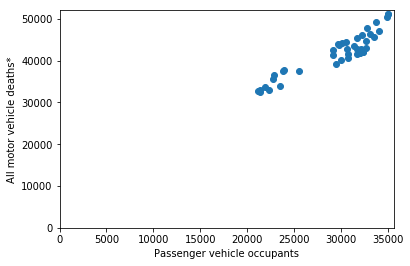

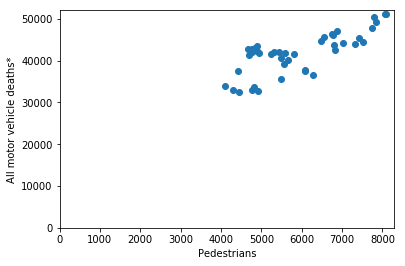

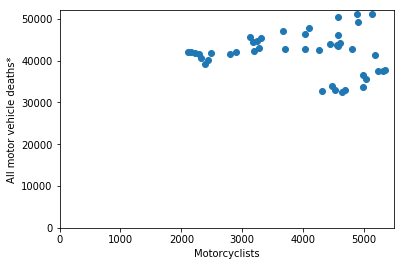

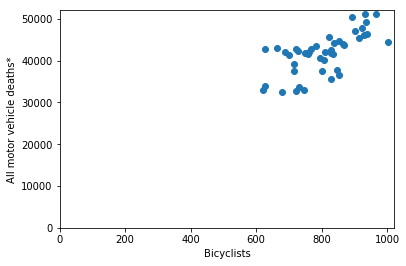

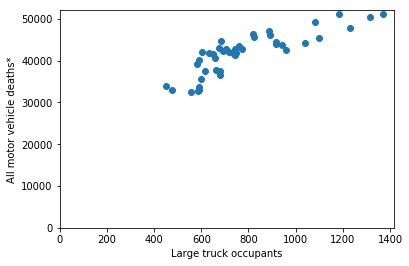

In [50]:
#This function graphs the scatter plots for car crashes
def scatter_it(x, y):
    plt.scatter(x, y)
    plt.xlim(0)
    plt.ylim(0)
    plt.show()
    
    
car_passenger = car_crashes["Passenger vehicle occupants"]
car_pedestrians = car_crashes["Pedestrians"]
car_motorcyclists = car_crashes["Motorcyclists"]
car_bicyclists = car_crashes["Bicyclists"]
car_truck = car_crashes["Large truck occupants"]
car_all = car_crashes["All motor vehicle deaths*"]

car_column_data = [car_passenger, car_pedestrians, car_motorcyclists, car_bicyclists, car_truck, car_all]

def plot_scatter(cols):
    for x in range(len(cols)-1):
        pyplot.scatter(cols[x], cols[-1])
        pyplot.xlim(0)
        pyplot.ylim(0)
        pyplot.xlabel(car_titles[x])
        pyplot.ylabel(car_titles[-1])
        pyplot.show()
plot_scatter(car_column_data)


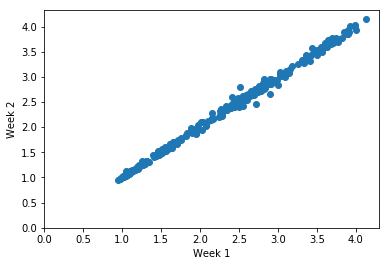

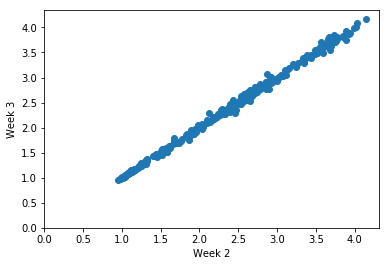

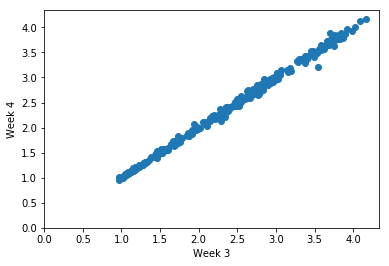

In [51]:
#This function graphs the scatter plots for gas prices

gas_week1 = gas_prices_df[gas_title[0]]
gas_week2 = gas_prices_df[gas_title[1]]
gas_week3 = gas_prices_df[gas_title[2]]
gas_week4 = gas_prices_df[gas_title[3]]

gas_column_data = [gas_week1, gas_week2, gas_week3, gas_week4]


def gas_plot_scatter(cols):
    for x in range(len(cols)-1):
        pyplot.scatter(cols[x], cols[x+1])
        pyplot.xlim(0)
        pyplot.ylim(0)
        pyplot.xlabel(gas_title[x])
        pyplot.ylabel(gas_title[x+1])
        pyplot.show()
gas_plot_scatter(gas_column_data)

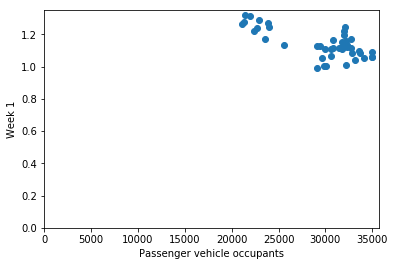

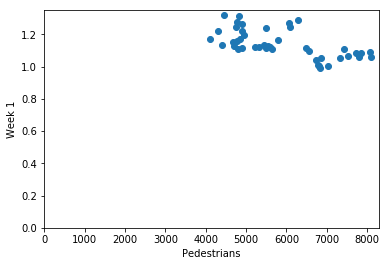

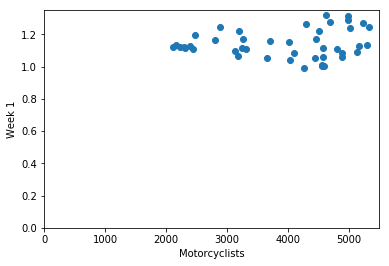

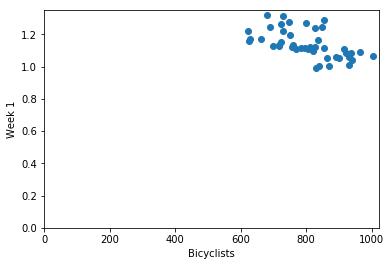

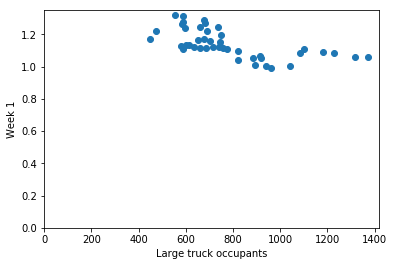

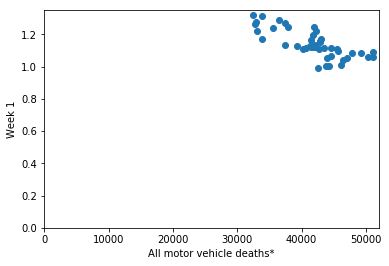

In [52]:
#This function graphs the scatter plots for both car crashes and week 1 gas prices
def both_plot_scatter_w1(cols):
    for x in range(len(cols)):
        pyplot.scatter(cols[x],  gas_column_data[0][:len(car_column_data[1])])
        pyplot.xlim(0)
        pyplot.ylim(0)
        pyplot.xlabel(car_titles[x])
        pyplot.ylabel(gas_title[0])
        pyplot.show()
both_plot_scatter_w1(car_column_data)

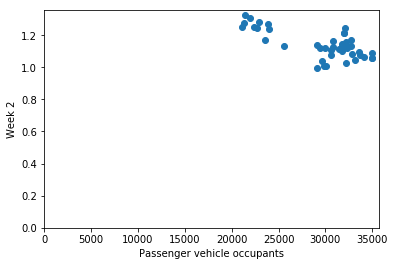

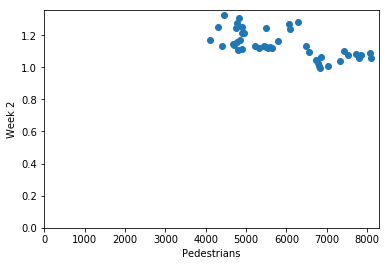

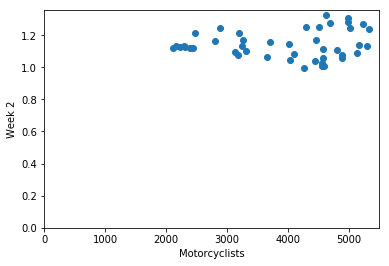

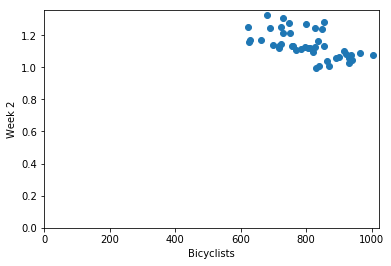

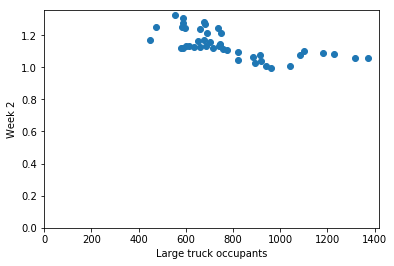

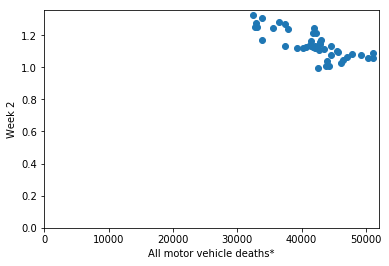

In [53]:
#This function graphs the scatter plots for both car crashes and week 2 gas prices
def both_plot_scatter_w2(cols):
    acc = 0
    for x in range(len(cols)):
        pyplot.scatter(cols[x],  gas_column_data[1][:len(car_column_data[1])])
        pyplot.xlim(0)
        pyplot.ylim(0)
        pyplot.xlabel(car_titles[x])
        pyplot.ylabel(gas_title[1])
        pyplot.show()
    acc +=1
both_plot_scatter_w2(car_column_data)

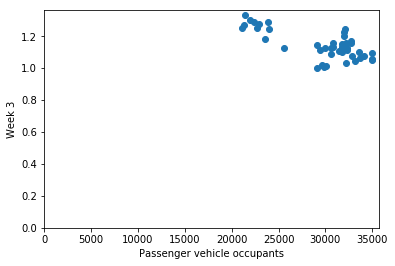

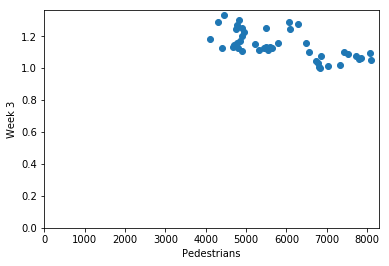

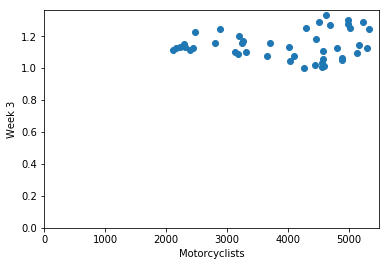

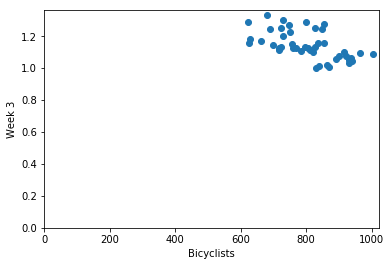

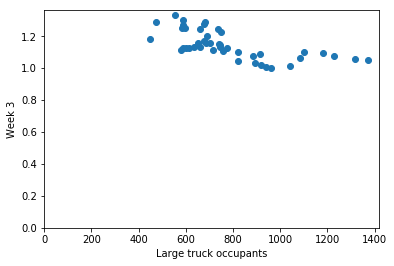

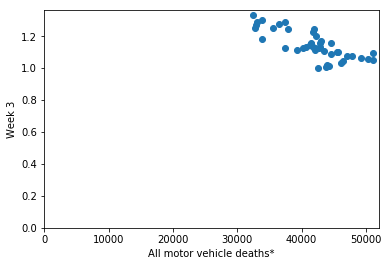

In [54]:
#This function graphs the scatter plots for both car crashes and week 3 gas prices
def both_plot_scatter_w3(cols):
    acc = 0
    for x in range(len(cols)):
        pyplot.scatter(cols[x],  gas_column_data[2][:len(car_column_data[1])])
        pyplot.xlim(0)
        pyplot.ylim(0)
        pyplot.xlabel(car_titles[x])
        pyplot.ylabel(gas_title[2])
        pyplot.show()
    acc +=1
both_plot_scatter_w3(car_column_data)

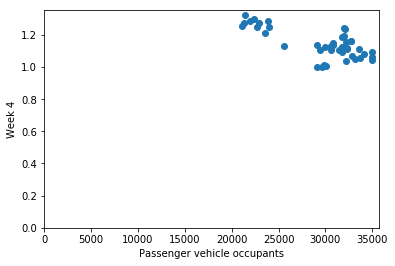

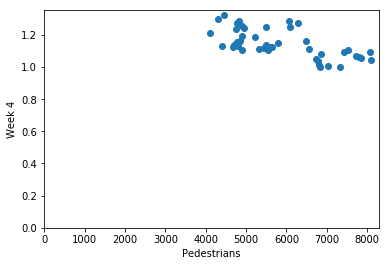

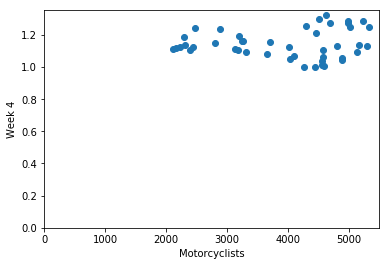

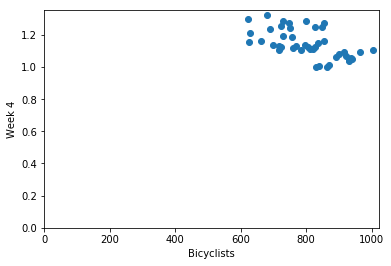

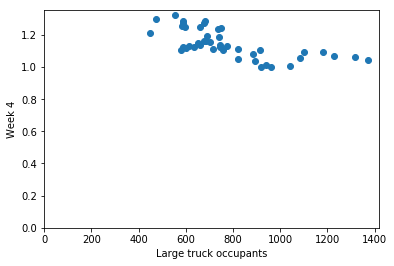

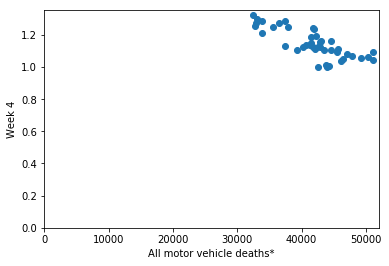

In [85]:
#This function graphs the scatter plots for both car crashes and week 4 gas prices
def both_plot_scatter_w4(cols):
    acc = 0
    for x in range(len(cols)):
        pyplot.scatter(cols[x],  gas_column_data[3][:len(car_column_data[1])])
        pyplot.xlim(0)
        pyplot.ylim(0)
        pyplot.xlabel(car_titles[x])
        pyplot.ylabel(gas_title[3])
        pyplot.show()
    acc +=1
both_plot_scatter_w4(car_column_data)

Passenger vehicle occupants


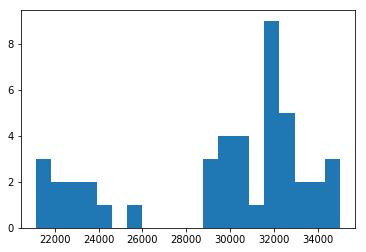

Pedestrians


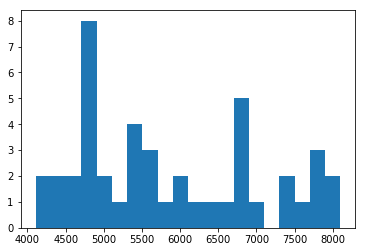

Motorcyclists


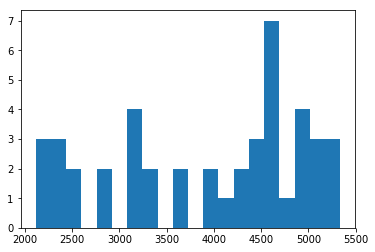

Bicyclists


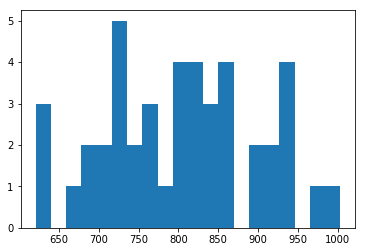

Large truck occupants


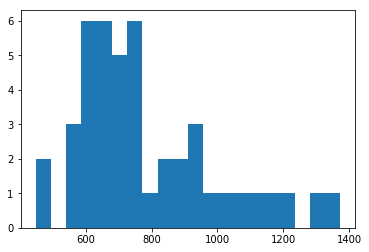

All motor vehicle deaths*


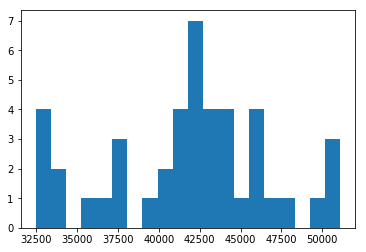

In [56]:
#This function plots the histogram for car crashes 
for x in range(len(car_column_data)):
    print(car_titles[x])
    pyplot.hist(car_column_data[x], bins=20)
    pyplot.show()

# note: counts are on the y axis

Week 1


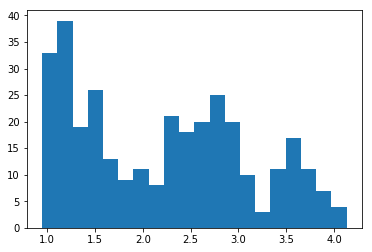

Week 2


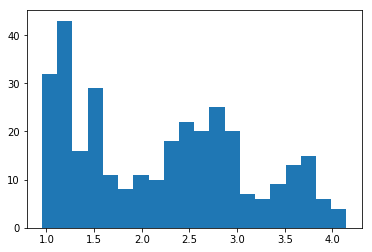

Week 3


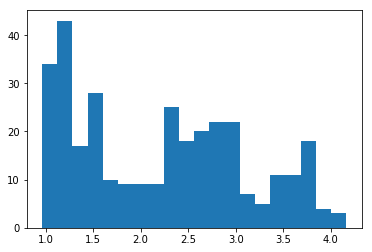

Week 4


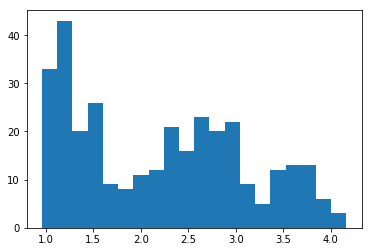

In [57]:
#This function plots the histogram for gas prices
for x in range(len(gas_column_data)):
    print(gas_title[x])
    pyplot.hist(gas_column_data[x], bins=20)
    pyplot.show()

In [83]:

#This function converts the numbers in a column to a float.
def convert(column):
    conversion = []
    for x in column:
        conversion.append(float(x))
    return conversion



#This function converts the each item in a list into an array of floats
def convert_car_nums(car_arry):
    all_conversions = []
    for x in car_arry:
        all_conversions.append(convert(x))
    return all_conversions
car_nums_conversions = convert_car_nums(car_column_data)




#This function finds the linear regression between car crashes and gas prices 
def calc_lin_reg(x_list, y_list):
    for data_column in range(len(x_list)):
        data = {"X": x_list[data_column], "Y": y_list}
        dataframe = pd.DataFrame(data)

        x = dataframe.X.values
        y = dataframe.Y.values

        x = x.reshape(-1, 1)
        y = y.reshape(-1, 1)

        model = linear_model.LinearRegression()
        model.fit(x,y)
        print(car_titles[data_column] + " :"+ str(float(model.coef_)))

print("Gas price week 1 linear regressions with: ")
short_w1 = gas_column_data[0][:len(car_column_data[1])]
calc_lin_reg(car_nums_conversions, short_w1)
print(" ")

print("Gas price week 2 linear regressions with: ")
short_w2 = gas_column_data[1][:len(car_column_data[1])]
calc_lin_reg(car_nums_conversions, short_w2)
print(" ")

print("Gas price week 3 linear regressions with: ")
short_w3 = gas_column_data[2][:len(car_column_data[1])]
calc_lin_reg(car_nums_conversions, short_w3)
print(" ")

print("Gas price week 4 linear regressions with: ")
short_w4 = gas_column_data[3][:len(car_column_data[1])]
calc_lin_reg(car_nums_conversions, short_w4)
print(" ")


Gas price week 1 linear regressions with: 
Passenger vehicle occupants :-1.4301947867767141e-05
Pedestrians :-4.547222265027114e-05
Motorcyclists :1.0633827744951811e-05
Bicyclists :-0.0005028057551034956
Large truck occupants :-0.0002498140095505051
All motor vehicle deaths* :-1.3336358603718249e-05
 
Gas price week 2 linear regressions with: 
Passenger vehicle occupants :-1.4180237822177505e-05
Pedestrians :-4.650533314702877e-05
Motorcyclists :8.57267716503787e-06
Bicyclists :-0.0005060366041044574
Large truck occupants :-0.0002575219456201501
All motor vehicle deaths* :-1.3421150251192473e-05
 
Gas price week 3 linear regressions with: 
Passenger vehicle occupants :-1.468890583467263e-05
Pedestrians :-4.78947258966886e-05
Motorcyclists :9.064817260657356e-06
Bicyclists :-0.0005223099837047339
Large truck occupants :-0.00026866549525493316
All motor vehicle deaths* :-1.3891972006404423e-05
 
Gas price week 4 linear regressions with: 
Passenger vehicle occupants :-1.4799083722801587e

In [107]:
#This function rreturns the random regression for car crash deaths
def car_random_regression(n, column):
    y = []
    for i in range(len(car_column_data[0])):
        y.append(np.random.normal(0, 1))
        
    data = {"x": column, "y": y}
    dataframe = pd.DataFrame(data)
    x = dataframe.x.values
    y = dataframe.y.values
    
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    
    model = linear_model.LinearRegression()
    model.fit(x,y)
    return float(model.coef_)
print("Random regressions for car crash deaths with n=length of observations:")
for x in range(len(car_column_data)):
    print(car_titles[x] + ' ' + str(car_random_regression(len(car_column_data[0]), car_column_data[x])))
print(" ")


print("Random regressions for car crash deaths with n=10:")
for x in range(len(car_column_data)):
    print(car_titles[x] + ' ' + str(car_random_regression(10, car_column_data[x])))
print(" ")
    
    

#This function rreturns the random regression for gas prices
def gas_random_regression(n, column):
    y = []
    for i in range(len(gas_column_data[0])):
        y.append(np.random.normal(0, 1))
        
    data = {"x": column, "y": y}
    dataframe = pd.DataFrame(data)
    x = dataframe.x.values
    y = dataframe.y.values
    
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    
    model = linear_model.LinearRegression()
    model.fit(x,y)
    return float(model.coef_)

print("Random regressions for gas prices with n=length of observations:")
for x in range(len(gas_column_data)):
    print(gas_title[x] + ' ' + str(gas_random_regression(len(gas_column_data[0]), gas_column_data[x])))
print(" ")


print("Random regressions for gas prices with n=10:")
for x in range(len(gas_column_data)):
    print(gas_title[x] + ' ' + str(gas_random_regression(10, gas_column_data[x])))


Random regressions for car crash deaths with n=length of observations:
Passenger vehicle occupants 2.2053962727015005e-06
Pedestrians -6.006837803355932e-06
Motorcyclists -3.19598875796499e-05
Bicyclists -0.0010553038766398532
Large truck occupants -0.0004055693078216237
All motor vehicle deaths* -2.1738302675043948e-05
 
Random regressions for car crash deaths with n=10:
Passenger vehicle occupants 1.0962937841720932e-05
Pedestrians 0.00019515140170188762
Motorcyclists -0.00014233867444173083
Bicyclists -0.00377250683260581
Large truck occupants -7.192817336180478e-05
All motor vehicle deaths* -1.1743254167220507e-05
 
Random regressions for gas prices with n=length of observations:
Week 1 0.023068044582146296
Week 2 -0.03994077136658558
Week 3 0.03238499540544222
Week 4 0.00693087992413813
 
Random regressions for gas prices with n=10:
Week 1 0.0586002240310779
Week 2 -0.029056097247403847
Week 3 0.008013713663890988
Week 4 0.02720143578537569
